## Creating Plots and Charts to Visualize Data in Pandas 

### Import the pandas library for data manipulation and the matplotlib library for creating visualizations. Make sure to set the matplotlib to inline so that all plots are displayed directly within this Notebook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Execute the following code snippet to load the data into the Notebook 

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

stocks = pdr.get_data_yahoo(tickers = 'BB', start = '2007-01-01', end = '2020-12-31')
stocks.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,43.086666,44.026669,41.703335,42.849998,42.849998,34739100
2007-01-04,42.953335,46.316666,42.423332,46.189999,46.189999,46007700
2007-01-05,45.500000,47.306667,45.166668,47.099998,47.099998,41453400
2007-01-08,47.283333,48.410000,46.606667,47.386665,47.386665,38547300
2007-01-09,47.570000,47.666668,43.263332,43.666668,43.666668,74142000


### Overview of the Code Snippet

This code snippet retrieves historical stock market data for a specific company (`BB` for BlackBerry) from Yahoo Finance using the `pandas_datareader` and `yfinance` libraries.

#### Breakdown:
1. **Importing Libraries**:
   - `pandas_datareader` is imported as `pdr` to fetch data from online sources like Yahoo Finance.
   - `yfinance` (Yahoo Finance API) is imported to handle data retrieval, as `pandas_datareader`'s direct Yahoo Finance functionality is deprecated.
   - `yf.pdr_override()`: Overrides the default behavior of `pandas_datareader` to use `yfinance` for fetching data.

2. **Fetching Stock Data**:
   - `pdr.get_data_yahoo(...)`: Retrieves stock data for the specified ticker (`BB`), start date (`2007-01-01`), and end date (`2020-12-31`).
   - The data includes attributes like open, high, low, close prices, adjusted close prices, and trading volume for each day in the specified range.

3. **Previewing the Data**:
   - `stocks.head()`: Displays the first five rows of the retrieved data for inspection.

### How can you create a line plot to visualize the "High" prices from the `stocks` DataFrame over time? 

<AxesSubplot: xlabel='Date'>

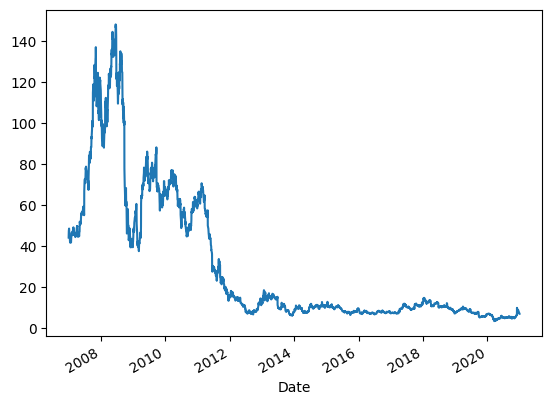

In [3]:
stocks['High'].plot()

### Plot the High and Close prices of stock data with customization

- How can you create a line plot to visualize both the "High" and "Close" prices from the `stocks` DataFrame, add a title to the plot, and enable a grid for better readability? 

<AxesSubplot: title={'center': 'High and Close(2008-2020)'}, xlabel='Date'>

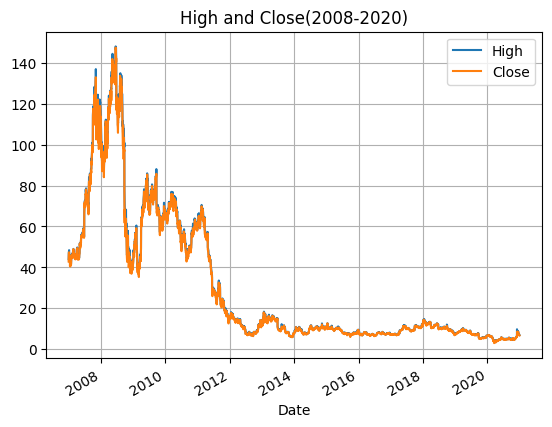

In [4]:
stocks[['High', 'Close']].plot(kind = 'line', title = 'High and Close(2008-2020)', grid = True)

- Alternate Approach
```python
#stocks[['High', 'Close']].plot()
plt.plot(stocks[['High', 'Close']])
plt.title("High and Close (2008-2020)")
plt.grid(visible = True)
```

### Visualize all columns of stock data as individual subplots

- How can you plot all columns of the `stocks` DataFrame as separate `subplots` arranged in a 3x3 grid layout, with a customized figure size for better visualization? 

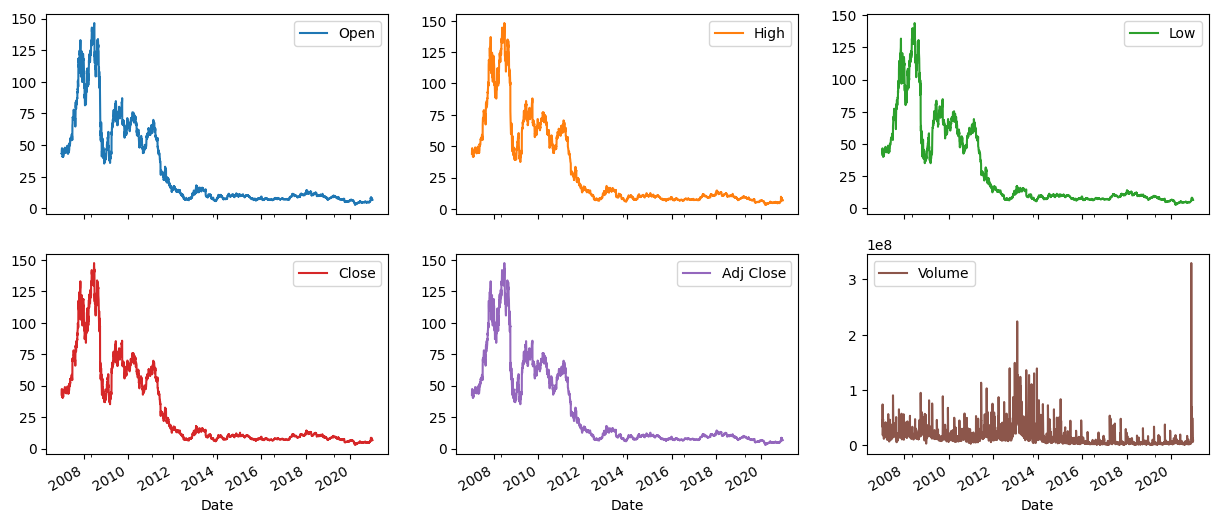

In [5]:
stocks.plot(subplots = True, layout = (3,3), figsize = (15,10))
plt.show()

### Perform the following operations:

- Create a line plot to visualize the "High" and "Close" prices from the `stocks` DataFrame  
- Set a custom title for the plot and customize its color  
- Use methods to set custom labels for the x-axis and y-axis and customize their text color  
- Modify the colors of the tick labels on both axes  
- Customize the legend to display labels with a specific text color  


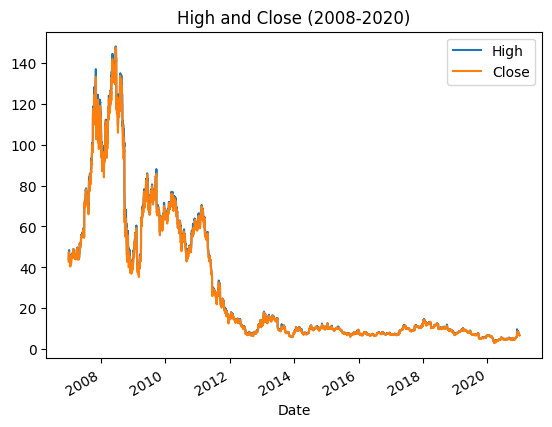

In [6]:
stocks[['High', 'Close']].plot(kind = 'line')
plt.title("High and Close (2008-2020)", color = 'black')
plt.xlabel("Date", color = 'black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.legend(labelcolor = 'black')
plt.show()

### Define a function `classify_stock_price` that classifies the stock price as 
- `"Poor"` if the price is less than or equal to 10, 
- `"Satisfactory"` if the price is between 10 and 50, and 
- `"Stellar"` if the price is greater than 50.  

In [7]:
def classify_stock_price(stock_price):
    if stock_price<=10:
        return "Poor"
    elif stock_price <=50:
        return "Satisfactory"
    else:
        return "Stellar"

### Perform the following operations:

- Apply the `classify_stock_price` function to the 'Close' column of the `stocks` DataFrame and count the occurrences of each category.  
- Sort the value counts in ascending order and plot them as a bar chart.  
- Customize the x-axis and y-axis tick colors, and set the x-axis tick labels to a horizontal orientation.  
- Set a title for the bar chart as "Stock Performance" and display the plot.  


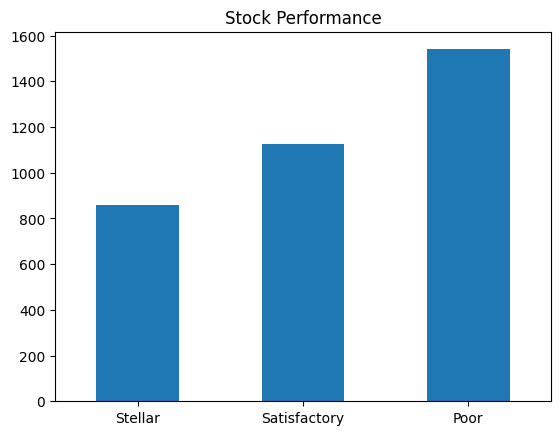

In [8]:
stock_categories_count = stocks['Close'].apply(classify_stock_price).value_counts()

sorted_stock_category_count = stock_categories_count.sort_values(ascending = True)

sorted_stock_category_count.plot(kind = 'bar')

plt.xticks(color = 'black', rotation = 0)
plt.yticks(color = 'black')
plt.title("Stock Performance")

plt.show()

- Alternate one liner approach
```python
stocks['Close'].apply(classify_stock_price).value_counts().sort_values(ascending = True).plot(kind = 'bar')
plt.xticks(color = 'black', rotation = 0)
plt.yticks(color = 'black')
plt.title("Stock Performance")
plt.show()
```

### Perform the following operations:
- Calculate the mean of the 'Close' prices in the `stocks` DataFrame and store it in a variable called `mean_stock_price`.  
- Define a function `rank_stock_performance` that classifies stock prices as "Below Average" if they are lower than the mean price and "Above Average" if they are higher or equal to the mean price.

In [9]:
mean_stock_price = stocks['Close'].mean()

In [10]:
def rank_stock_performance(stock_price):
    if stock_price < mean_stock_price:
        return "Below Average"
    else:
        return "Above Average"

### Perform the following operations:

- Apply the `rank_stock_performance` function to the 'Close' column of the `stocks` DataFrame 
- Count the occurrences of each category so formed.  
- Plot the result as a pie chart.  
- Remove the ylabel and set a title for the pie chart as "Stock Price Comparison".  
- Display the pie chart with the applied customizations.

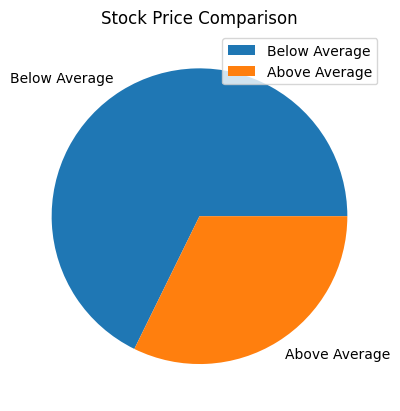

In [11]:
stock_performance_ranks = stocks['Close'].apply(rank_stock_performance)

stock_performance_ranks_count = stock_performance_ranks.value_counts()

stock_performance_ranks_count.plot(kind = 'pie')

plt.ylabel(None)
plt.title("Stock Price Comparison")
plt.legend()
plt.show()

- Alternate Approach
```python
stocks['Close'].apply(rank_stock_performance).value_counts().plot(kind = 'pie', legend = True)
plt.ylabel("")
plt.title("Stock Price Comparison")
plt.show()
```